In [29]:
import pandas as pd
import numpy as np
import os


In [30]:
close = pd.read_csv("/Applications/Work Space/Python Work Space/python_forcesting/sp500_close.csv", index_col=0, parse_dates=True)
close

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,66.97,37.68,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83
2018-02-06,51.18,163.0300,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,68.99,37.34,78.35,58.46,30.85,71.33,80.58,122.30,52.52,73.27


<Axes: >

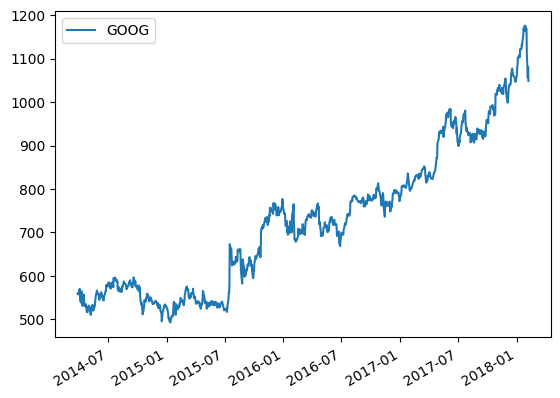

In [31]:
goog = close[["GOOG"]].copy().dropna()
goog.plot()

<Axes: >

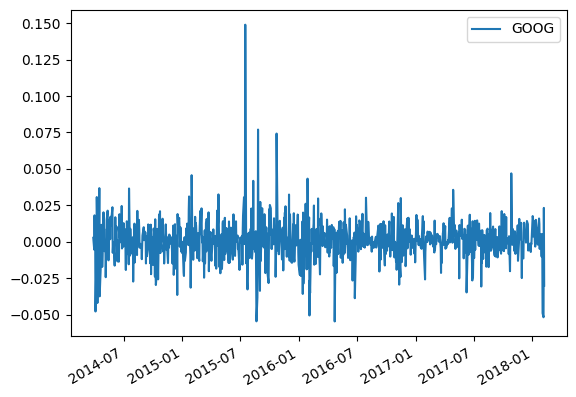

In [32]:
goog_ret = np.log(goog.pct_change(1) + 1)
goog_ret.plot()

<Axes: >

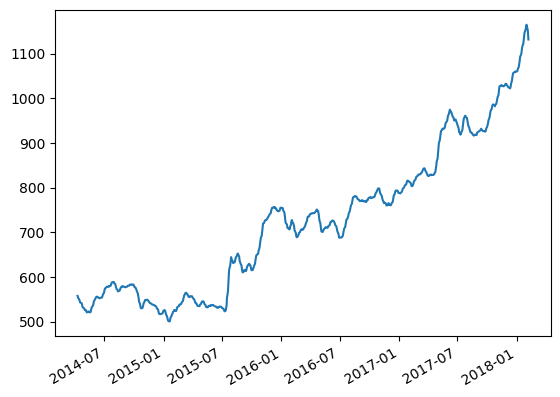

In [33]:
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()
goog["SMA-10"].plot()

<Axes: >

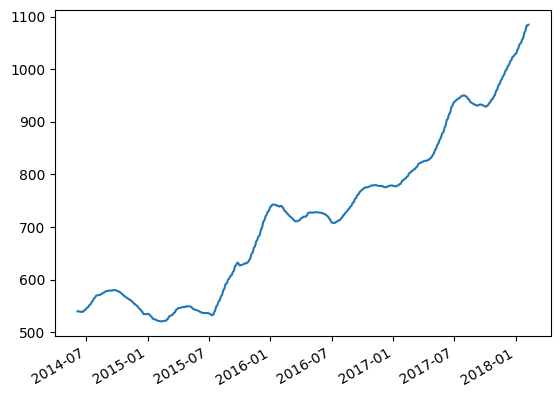

In [34]:
goog["SMA-50"] = goog["GOOG"].rolling(50).mean()
goog["SMA-50"].plot()

<Axes: >

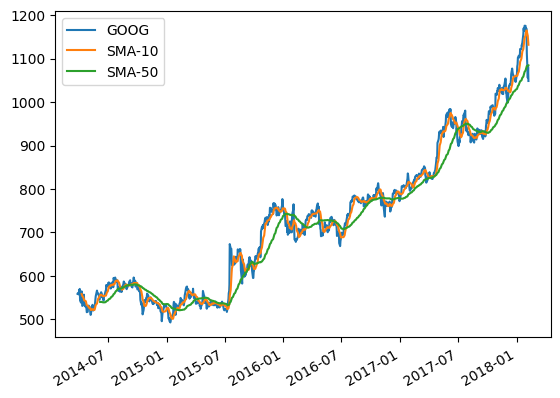

In [37]:
goog.plot()

## Application - 1

<Axes: >

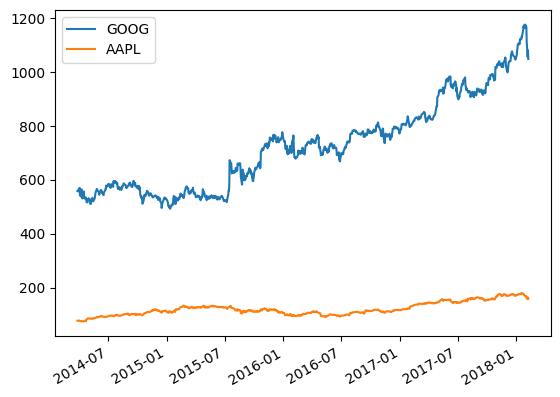

In [39]:
goog_app1 = close[["GOOG", "AAPL"]].copy().dropna()
goog_app1.plot()

                       GOOG       AAPL
2014-06-09 GOOG  287.788758   4.254229
           AAPL    4.254229  37.085191
2014-06-10 GOOG  288.257174  11.625651
           AAPL   11.625651  38.908771
2014-06-11 GOOG  289.638982  18.050267
           AAPL   18.050267  40.307222
2014-06-12 GOOG  276.995305  23.613153
           AAPL   23.613153  41.061145
2014-06-13 GOOG  264.536574  29.083854
           AAPL   29.083854  41.348506
2014-06-16 GOOG  245.762890  34.484683
           AAPL   34.484683  41.604958
2014-06-17 GOOG  245.739613  35.927763
           AAPL   35.927763  41.303440
2014-06-18 GOOG  250.038984  37.968901
           AAPL   37.968901  40.351765
2014-06-19 GOOG  250.038984  43.515126
           AAPL   43.515126  39.063871
2014-06-20 GOOG  243.263588  50.453881
           AAPL   50.453881  37.732514
2014-06-23 GOOG  256.854641  53.531378
           AAPL   53.531378  35.771790
2014-06-24 GOOG  267.899338  53.452661
           AAPL   53.452661  33.239182
2014-06-25 GOOG  296.3822

<Axes: >

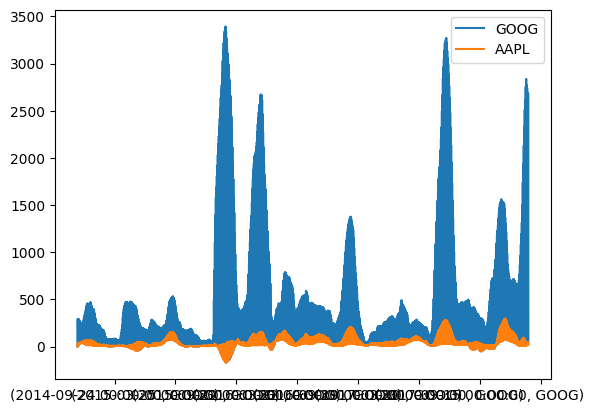

In [48]:
covariance_app1 =  goog_app1.rolling(50).cov()
print(covariance_app1[100:150])
covariance_app1.plot()

In [49]:
covariance_app1.loc["2014-07-14"]

,GOOG,AAPL
GOOG,459.542113,70.101367
AAPL,70.101367,14.271610


In [50]:
goog_app1_ret = np.log(1 + goog_app1.pct_change(1))
goog_app1_ret

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661
...,...,...
2018-02-01,-0.001916,0.002088
2018-02-02,-0.048966,-0.044360
2018-02-05,-0.051771,-0.025302
2018-02-06,0.023218,0.040942


In [52]:
goog_app1_ret["GOOG_SMA-50"] = goog_app1_ret["GOOG"].rolling(50).mean()
goog_app1_ret["AAPL_SMA-50"] = goog_app1_ret["AAPL"].rolling(50).mean()

<Axes: >

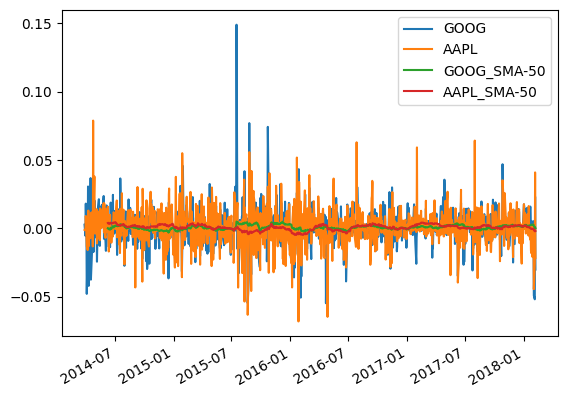

In [54]:
goog_app1_ret.plot()

In [55]:
covariance_50 = goog_app1_ret[["GOOG_SMA-50", "AAPL_SMA-50"]].rolling(50).cov()
covariance_50

GOOG_SMA-50   AAPL_SMA-50
2014-03-27 GOOG_SMA-50           NaN           NaN
           AAPL_SMA-50           NaN           NaN
2014-03-28 GOOG_SMA-50           NaN           NaN
           AAPL_SMA-50           NaN           NaN
2014-03-31 GOOG_SMA-50           NaN           NaN
...                              ...           ...
2018-02-05 AAPL_SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG_SMA-50  2.852362e-07 -1.882949e-08
           AAPL_SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG_SMA-50  3.430702e-07  8.238184e-08
           AAPL_SMA-50  8.238184e-08  1.506869e-06

[1950 rows x 2 columns]

In [57]:
correlation_50 = goog_app1_ret[["GOOG_SMA-50", "AAPL_SMA-50"]].rolling(50).corr()
correlation_50

GOOG_SMA-50  AAPL_SMA-50
2014-03-27 GOOG_SMA-50          NaN          NaN
           AAPL_SMA-50          NaN          NaN
2014-03-28 GOOG_SMA-50          NaN          NaN
           AAPL_SMA-50          NaN          NaN
2014-03-31 GOOG_SMA-50          NaN          NaN
...                             ...          ...
2018-02-05 AAPL_SMA-50    -0.138433     1.000000
2018-02-06 GOOG_SMA-50     1.000000    -0.030574
           AAPL_SMA-50    -0.030574     1.000000
2018-02-07 GOOG_SMA-50     1.000000     0.114578
           AAPL_SMA-50     0.114578     1.000000

[1950 rows x 2 columns]